In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
full_train_data = pd.read_csv("../data/train.csv")
valid_ffv = full_train_data[full_train_data['FFV'].notna()]

two_star_ffv = valid_ffv[valid_ffv['SMILES'].str.count(r"\*") == 2]

*CC(*)C(=O)OCCCCCCCCCCCCCCCCCC


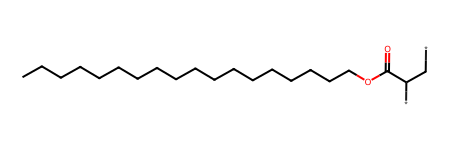

In [4]:
sample_smiles = two_star_ffv.sample(1, random_state=42).iloc[0]['SMILES']
print(sample_smiles)

from rdkit import Chem
sample_mol = Chem.MolFromSmiles(sample_smiles)

sample_mol

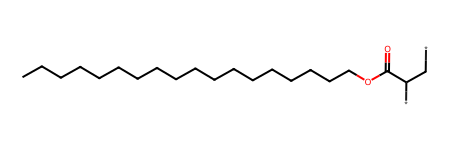

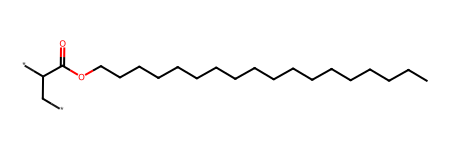

In [6]:
from pysmiles import read_smiles, write_smiles
import networkx as nx
from data_gen_helpers import get_symmetric_smiles_ending_at_asterick, display_smiles

grouped_smiles = get_symmetric_smiles_ending_at_asterick(sample_smiles)

display_smiles(grouped_smiles)

['*C(C(OCCCCCCCCCCCCCCCCCC)=O)CCC(C(OCCCCCCCCCCCCCCCCCC)=O)*', '*C(C(OCCCCCCCCCCCCCCCCCC)=O)CC(C(OCCCCCCCCCCCCCCCCCC)=O)C*']


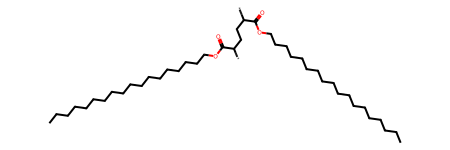

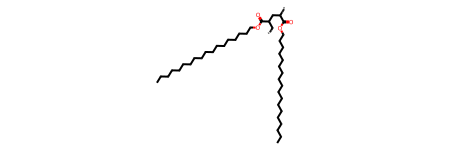

In [7]:
from data_gen_helpers import connect_smiles_graphwise

extended_smiles = connect_smiles_graphwise(sample_smiles, sample_smiles)
print(extended_smiles)
display_smiles(extended_smiles)

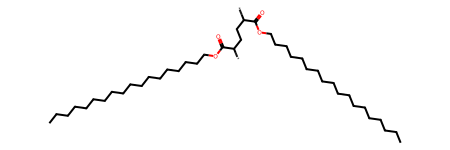

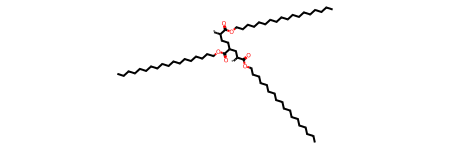

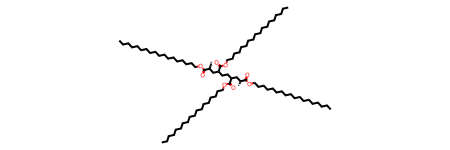

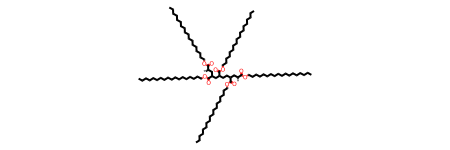

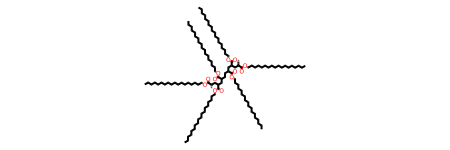

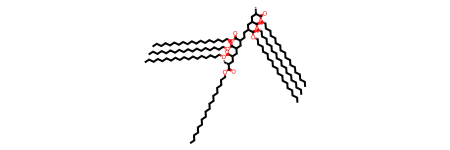

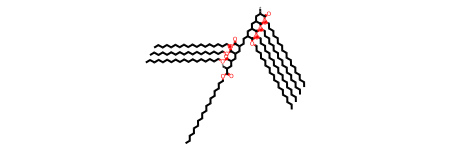

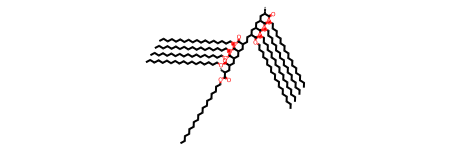

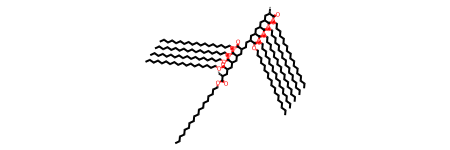

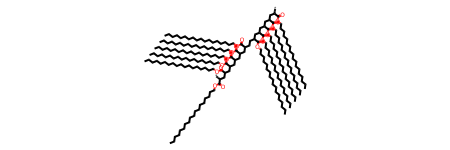

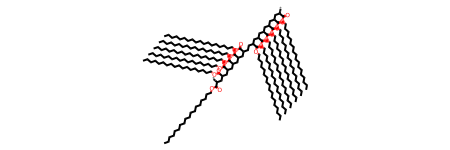

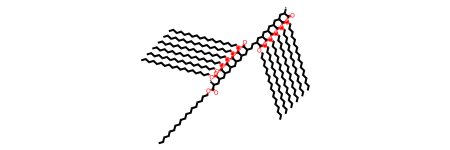

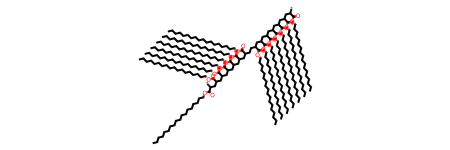

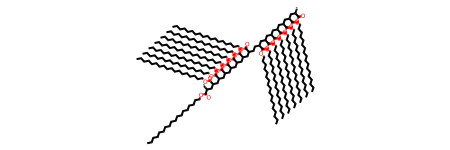

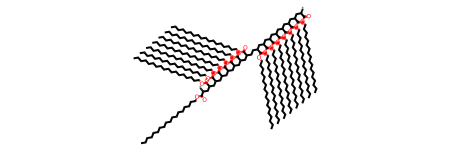

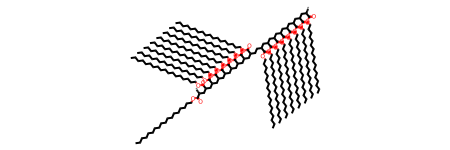

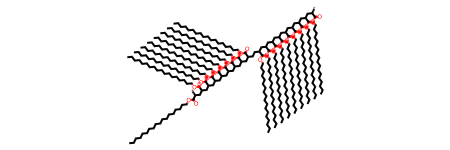

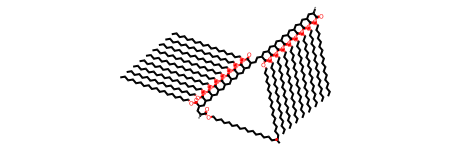

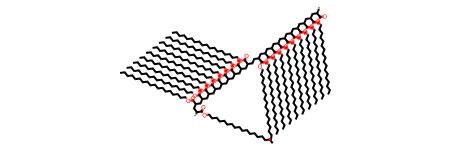

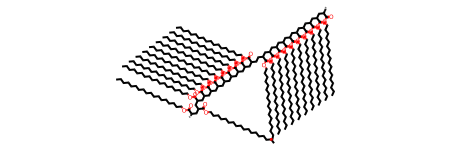

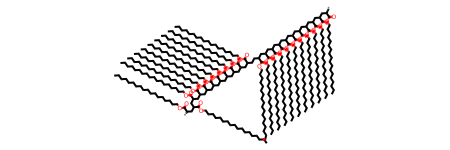

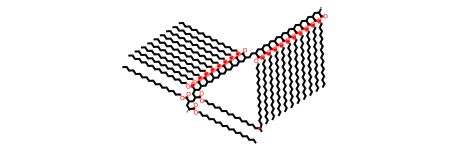

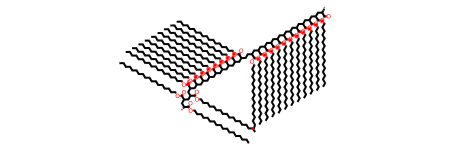

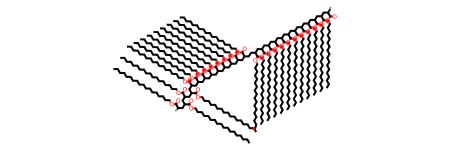

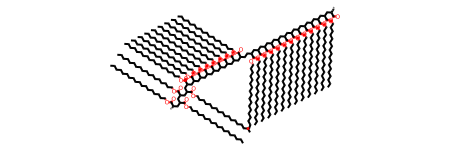

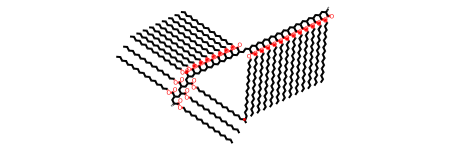

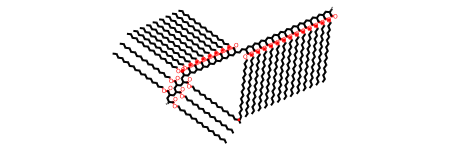

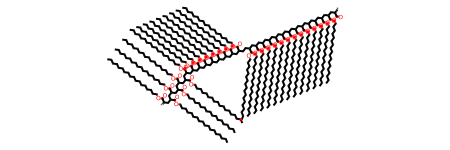

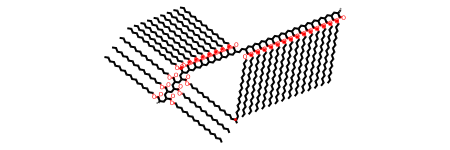

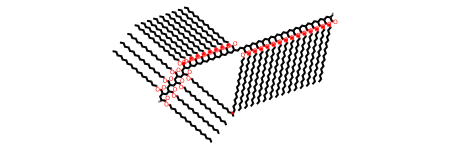

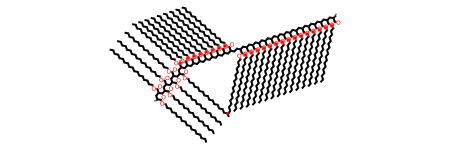

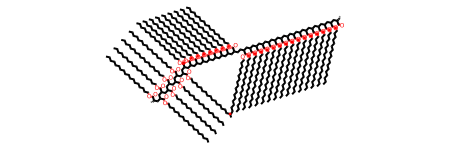

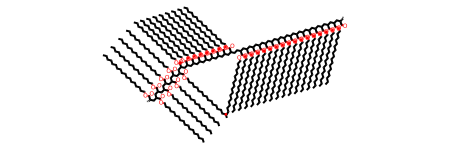

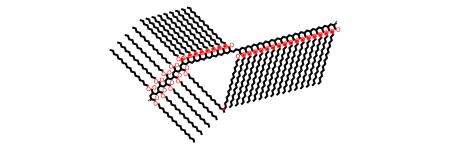

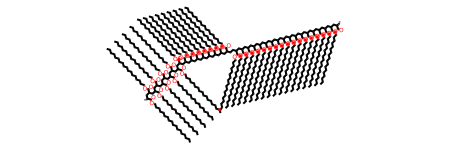

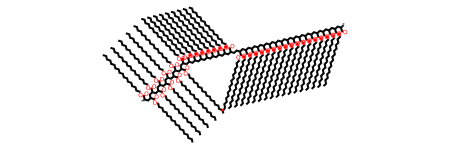

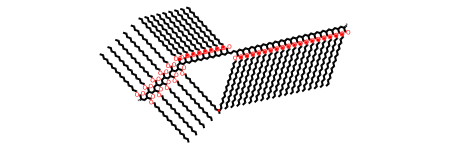

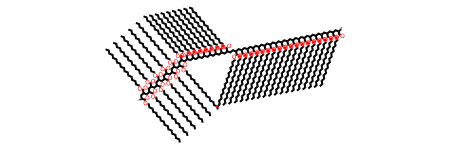

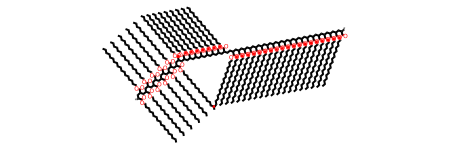

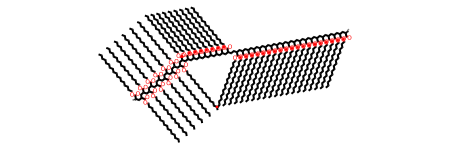

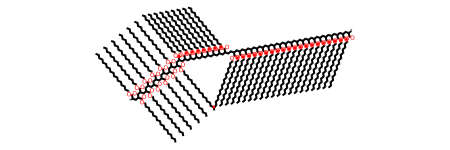

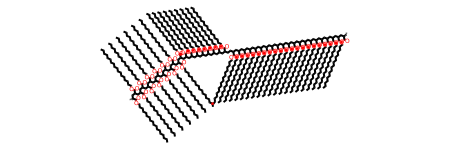

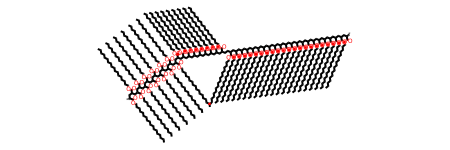

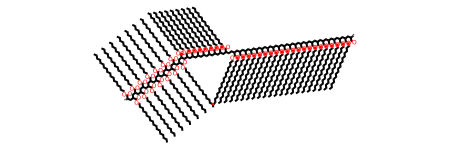

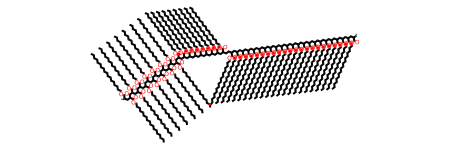

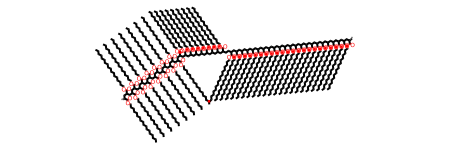

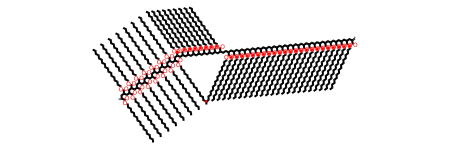

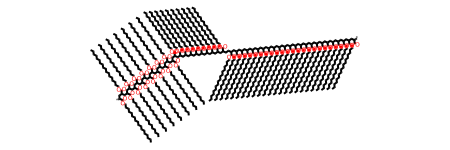

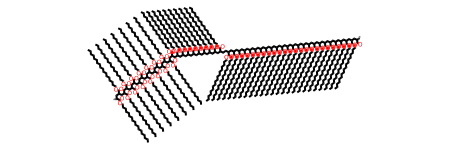

In [ ]:
from data_gen_helpers import iterative_extend_smiles

async for s in iterative_extend_smiles(sample_smiles, max_length=2000):
    extended_mol = Chem.MolFromSmiles(s)
    display(extended_mol)